# "Model Prediksi Harga Vila: Analisis Fasilitas & Lokasi dengan Machine Learning"

Tujuan Utama: 
- Menentukan harga sewa properti sesuai dengan fasilitas yang ada.
- Membangun model prediksi.

- Target : `Harga`

Web : https://www.bukitvista.com/bali-long-term-rentals

Data Properti:
- Harga sewa
- Fasilitas
- Lokasi

Data Pelanggan:
- Rating
- Durasi menginap.

# Dataset

In [1]:
# import library
import os
import glob
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
# Path folder
folder_path = r'/Users/macshop.jpn/Documents/Data Science/bukitvista/'

# Ambil semua file .xlsx dari folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Inisialisasi DataFrame gabungan
combined_df = pd.DataFrame()

# Loop untuk membaca dan menggabungkan semua file
for file in file_list:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_excel(file_path)
        df['Source_Location'] = file.replace('.xlsx', '')  # Tambahkan nama lokasi dari nama file
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    except Exception as e:
        print(f"Gagal membaca {file}: {e}")

# Simpan hasil gabungan ke file baru dengan csv
data_path = os.path.join(folder_path, 'Daftar_vila_Dibali_Bukit_Vista.csv')
combined_df.to_csv(data_path, index=False)
print(f"Data berhasil digabungkan dan disimpan ke {data_path}")

Data berhasil digabungkan dan disimpan ke /Users/macshop.jpn/Documents/Data Science/bukitvista/Daftar_vila_Dibali_Bukit_Vista.csv


In [3]:
# tampilkan DataFrame
df =pd.read_csv(data_path)
df

,web-scraper-order,web-scraper-start-url,Daftar singgah di canggu,Daftar singgah di canggu-href,Nama vila,Lokasi,Ratting,Fasilitas,Nilai Kebersihan,Nilai Keakuratan,...,daftar singgah di uluwatu,daftar singgah di uluwatu-href,Daftar singgah di pererenan,Daftar singgah di pererenan-href,Daftar singgah di seminyak,Daftar singgah di seminyak-href,Daftar singgah diubud,Daftar singgah diubud-href,daftar singgah di nusa dua,daftar singgah di nusa dua-href
0,1750279954-1,https://www.airbnb.co.id/wishlists/v/160647719...,NaN,https://www.airbnb.co.id/rooms/110189387778498...,Canggu Poolside: Zen & Serenity Room,"Kecamatan Kuta Utara, Bali, Indonesia",4.83,2 tamu · · 1 kamar tidur · · 1 tempat tidur ...,4.7,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750279974-2,https://www.airbnb.co.id/wishlists/v/160647719...,NaN,https://www.airbnb.co.id/rooms/116123442029417...,Vila Canggu Cerah & Lapang Dengan Kolam Renang...,"Kuta Utara, Bali, Indonesia",4.9,6 tamu · · 3 kamar tidur · · 3 tempat tidur ...,4.9,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1750279994-3,https://www.airbnb.co.id/wishlists/v/160647719...,NaN,https://www.airbnb.co.id/rooms/41939525?adults...,Central Canggu Relaxing Room dengan Kolam rena...,"Kuta Utara, Bali, Indonesia",4.76,2 tamu · · 1 kamar tidur · · 1 tempat tidur ...,4.7,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1750280015-4,https://www.airbnb.co.id/wishlists/v/160647719...,NaN,https://www.airbnb.co.id/rooms/114526768536333...,Panorama Padi: Guesthouse Nyaman dengan Kolam ...,"Canggu South Kuta, Bali, Indonesia",4.81,2 tamu · · 1 kamar tidur · · 1 tempat tidur ...,4.7,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1750280035-5,https://www.airbnb.co.id/wishlists/v/160647719...,NaN,https://www.airbnb.co.id/rooms/35013366?adults...,Vila Cerah & Laidback dengan Kolam renang prib...,"Kabupaten Badung, Bali, Indonesia",4.78,6 tamu · · 3 kamar tidur · · 3 tempat tidur ...,4.7,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1750361468-4,https://id.airbnb.com/wishlists/v/1625612909?v...,NaN,NaN,Vila Keluarga Cita Rasa dengan Kolam Renang De...,"Kecamatan Kuta Selatan, Bali, Indonesia",4.63,4 tamu · · 2 kamar tidur · · 2 tempat tidur ...,4.7,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://id.airbnb.com/rooms/127931785729650415...
107,1750361488-5,https://id.airbnb.com/wishlists/v/1625612909?v...,NaN,NaN,Jelajahi Pantai Pandawa Dari Vila Kutuh Ini,"Kecamatan Kuta Selatan, Bali, Indonesia",4.81,4 tamu · · 2 kamar tidur · · 2 tempat tidur ...,4.8,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://id.airbnb.com/rooms/128515936531078787...
108,1750361508-6,https://id.airbnb.com/wishlists/v/1625612909?v...,NaN,NaN,Vila Kolam Renang Arsitektur Canggih di Nusa Dua,"Kecamatan Kuta Selatan, Bali, Indonesia",4.38,4 tamu · · 2 kamar tidur · · 2 tempat tidur ...,4.4,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://id.airbnb.com/rooms/132931144037432986...
109,1750361528-7,https://id.airbnb.com/wishlists/v/1625612909?v...,NaN,NaN,Kutuh's Quiet Verdant Room Near to Pandawa Beach,"Kecamatan Kuta Selatan, Bali, Indonesia",4.65,2 tamu · · 1 kamar tidur · · 1 tempat tidur ...,4.7,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://id.airbnb.com/rooms/131568189688433745...


In [4]:
# info data
print("\nInformasi DataFrame:")
print(df.info())


Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   web-scraper-order                             111 non-null    object 
 1   web-scraper-start-url                         111 non-null    object 
 2   Daftar singgah di canggu                      0 non-null      float64
 3   Daftar singgah di canggu-href                 16 non-null     object 
 4   Nama vila                                     111 non-null    object 
 5   Lokasi                                        111 non-null    object 
 6   Ratting                                       111 non-null    object 
 7   Fasilitas                                     111 non-null    object 
 8   Nilai Kebersihan                              111 non-null    float64
 9   Nilai Keakuratan                           

In [5]:
# cek duplikat
print("\nJumlah duplikat:")
print(df.duplicated().sum())


Jumlah duplikat:
0


In [6]:
# cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
web-scraper-order                                 0
web-scraper-start-url                             0
Daftar singgah di canggu                        111
Daftar singgah di canggu-href                    95
Nama vila                                         0
Lokasi                                            0
Ratting                                           0
Fasilitas                                         0
Nilai Kebersihan                                  0
Nilai Keakuratan                                  0
Nilai Check in                                    0
Nilai Komunikasi                                  0
Nilai Lokasi                                      0
Nilai ekonomis                                    0
Harga                                             3
Minimum menginap                                  1
Source_Location                                   0
Daftar sinngah dibingin                         111
Daftar sinngah dibingin-href  

# Pra pemrosesan data
- Data cleaning

In [7]:
# hapus kolom yang tidak diperlukan
columns_to_drop = ['web-scraper-order',
 'web-scraper-start-url',
 'Daftar singgah di canggu',
 'Daftar singgah di canggu-href',
 'Daftar singgah di ungasan',
 'Daftar singgah di ungasan-href',
 'daftar singgah di sidemen dan kintamani',
 'daftar singgah di sidemen dan kintamani-href',
 'daftar singgah di uluwatu',
 'daftar singgah di uluwatu-href',
 'Daftar singgah di pererenan',
 'Daftar singgah di pererenan-href',
 'Daftar singgah di seminyak',
 'Daftar singgah di seminyak-href',
 'Daftar singgah diubud',
 'Daftar singgah diubud-href',
 'daftar singgah di nusa dua',
 'daftar singgah di nusa dua-href',
 'daftar singgah di jimbaran-href',
 'Daftar sinngah dibingin',
 'Daftar sinngah dibingin-href',
 'daftar singgah di jimbaran-herf',
 'daftar singgah di jimbaran']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
# Simpan DataFrame yang telah dibersihkan ke file baru
cleaned_data_path = os.path.join(folder_path, 'Daftar_vila_Dibali_Bukit_Vista_Cleaned.csv')
df.to_csv(cleaned_data_path, index=False)
print(f"Data telah dibersihkan dan disimpan ke {cleaned_data_path}")
# Tampilkan DataFrame yang telah dibersihkan
print("DataFrame yang telah dibersihkan:")
df.head()


Data telah dibersihkan dan disimpan ke /Users/macshop.jpn/Documents/Data Science/bukitvista/Daftar_vila_Dibali_Bukit_Vista_Cleaned.csv
DataFrame yang telah dibersihkan:


,Nama vila,Lokasi,Ratting,Fasilitas,Nilai Kebersihan,Nilai Keakuratan,Nilai Check in,Nilai Komunikasi,Nilai Lokasi,Nilai ekonomis,Harga,Minimum menginap,Source_Location
0,Canggu Poolside: Zen & Serenity Room,"Kecamatan Kuta Utara, Bali, Indonesia",4.83,2 tamu · · 1 kamar tidur · · 1 tempat tidur ...,4.7,4.8,4.8,4.8,4.6,4.8,¥ 4.855,untuk 1 malam,2. Canggu
1,Vila Canggu Cerah & Lapang Dengan Kolam Renang...,"Kuta Utara, Bali, Indonesia",4.9,6 tamu · · 3 kamar tidur · · 3 tempat tidur ...,4.9,4.9,5.0,4.9,4.8,4.8,¥ 27.219,untuk 1 malam,2. Canggu
2,Central Canggu Relaxing Room dengan Kolam rena...,"Kuta Utara, Bali, Indonesia",4.76,2 tamu · · 1 kamar tidur · · 1 tempat tidur ...,4.7,4.8,4.8,4.8,4.9,4.7,¥ 7.790,untuk 2 malam,2. Canggu
3,Panorama Padi: Guesthouse Nyaman dengan Kolam ...,"Canggu South Kuta, Bali, Indonesia",4.81,2 tamu · · 1 kamar tidur · · 1 tempat tidur ...,4.7,4.9,4.9,4.8,4.8,4.8,¥ 4.103,untuk 1 malam,2. Canggu
4,Vila Cerah & Laidback dengan Kolam renang prib...,"Kabupaten Badung, Bali, Indonesia",4.78,6 tamu · · 3 kamar tidur · · 3 tempat tidur ...,4.7,4.8,4.9,4.9,4.6,4.8,¥ 16.112,untuk 1 malam,2. Canggu


In [8]:
df.shape

(111, 13)

In [9]:
# Tampilkan informasi DataFrame
print("Informasi DataFrame:")
print(df.info())

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nama vila         111 non-null    object 
 1   Lokasi            111 non-null    object 
 2   Ratting           111 non-null    object 
 3   Fasilitas         111 non-null    object 
 4   Nilai Kebersihan  111 non-null    float64
 5   Nilai Keakuratan  111 non-null    float64
 6   Nilai Check in    111 non-null    float64
 7   Nilai Komunikasi  111 non-null    float64
 8   Nilai Lokasi      111 non-null    float64
 9   Nilai ekonomis    111 non-null    float64
 10  Harga             108 non-null    object 
 11  Minimum menginap  110 non-null    object 
 12  Source_Location   111 non-null    object 
dtypes: float64(6), object(7)
memory usage: 11.4+ KB
None


In [10]:
# Cek nilai unik di kolom 'Ratting'
print(df['Ratting'].unique())

['4.83' '4.9' '4.76' '4.81' '4.78' '4.75' '4.66' '4.89' '4.79' '4.73'
 '4.4' '5.0' '4.64' '4.96' '4.82' '4.85' '4.87' '4.88' '4.92' '4.93'
 '4.59' '4.51' '4.94' '4.65' '4.63' '4.72' '4.74' '4.69' '4.71' '4.8'
 '4.98' '4.68' '4.7' 'Baru' '4,92' '4.77' '4.58' '4.67' '4.86' '4,86'
 '4.56' '4.84' '4.55' '4.95' '4.91' '4.52 ' '4.88 ' '4.0 ' '4.53 ' '4.83 '
 '4.87 ' '4.78 ' '4.94 ' '4.92 ' '5.0 ' '4.38']


In [11]:
# Ubah tipe harga
# Menghapus simbol "¥" dan titik, lalu konversi ke angka
df['Harga'] = df['Harga'].astype(str)
df['Harga'] = df['Harga'].str.replace('¥', '', regex=False).str.replace('.', '', regex=False).str.strip()

# Isi NaN dengan median sebelum konversi ke int
df['Harga'] = df['Harga'].replace('', np.nan)
df['Harga'] = df['Harga'].astype(float)
median_harga = df['Harga'].median()
df['Harga'] = df['Harga'].fillna(median_harga).astype(int)
# Ganti 'Baru' jadi NaN
df['Ratting'] = df['Ratting'].replace('Baru', np.nan)

# Ubah ke string dulu
df['Ratting'] = df['Ratting'].astype(str)

# Ganti koma jadi titik
df['Ratting'] = df['Ratting'].str.replace(',', '.')

# Ubah 'Ratting' ke float
df['Ratting'] = df['Ratting'].astype(float)

# isi NaN jadi 0
df['Ratting'] = df['Ratting'].fillna(0)

# Ubah 'Minimum menginap' ke numerik
df['Minimum menginap'] = pd.to_numeric(df['Minimum menginap'], errors='coerce')


In [12]:
# cek hasil
print ("\nHasil perubahan tipe data:")
print(df.dtypes)


Hasil perubahan tipe data:
Nama vila            object
Lokasi               object
Ratting             float64
Fasilitas            object
Nilai Kebersihan    float64
Nilai Keakuratan    float64
Nilai Check in      float64
Nilai Komunikasi    float64
Nilai Lokasi        float64
Nilai ekonomis      float64
Harga                 int64
Minimum menginap    float64
Source_Location      object
dtype: object


In [13]:
print("Jumlah NaN di Harga:", df['Harga'].isnull().sum())

Jumlah NaN di Harga: 0


In [14]:
# Ekstrak fitur dari kolom Fasilitas 
df['Jumlah_Tamu'] = df['Fasilitas'].str.extract(r'(\d+)\s*tamu').astype(float)
df['Jumlah_Kamar'] = df['Fasilitas'].str.extract(r'(\d+)\s*kamar tidur').astype(float)
df['Jumlah_Tempat_Tidur'] = df['Fasilitas'].str.extract(r'(\d+)\s*tempat tidur').astype(float)

# Exploratori data analis

- Visualisasi Distribusi harga

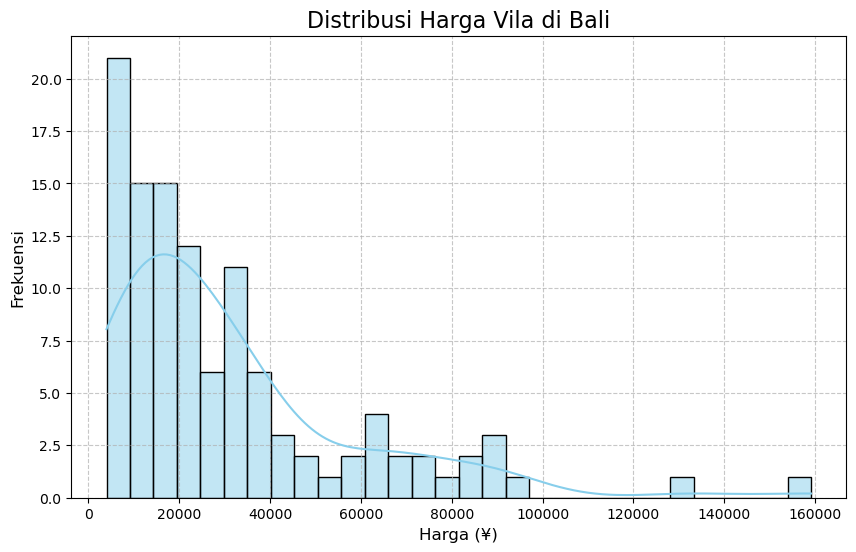

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Harga'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Harga Vila di Bali', fontsize=16)
plt.xlabel('Harga (¥)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- Harga berdasarkan lokasi

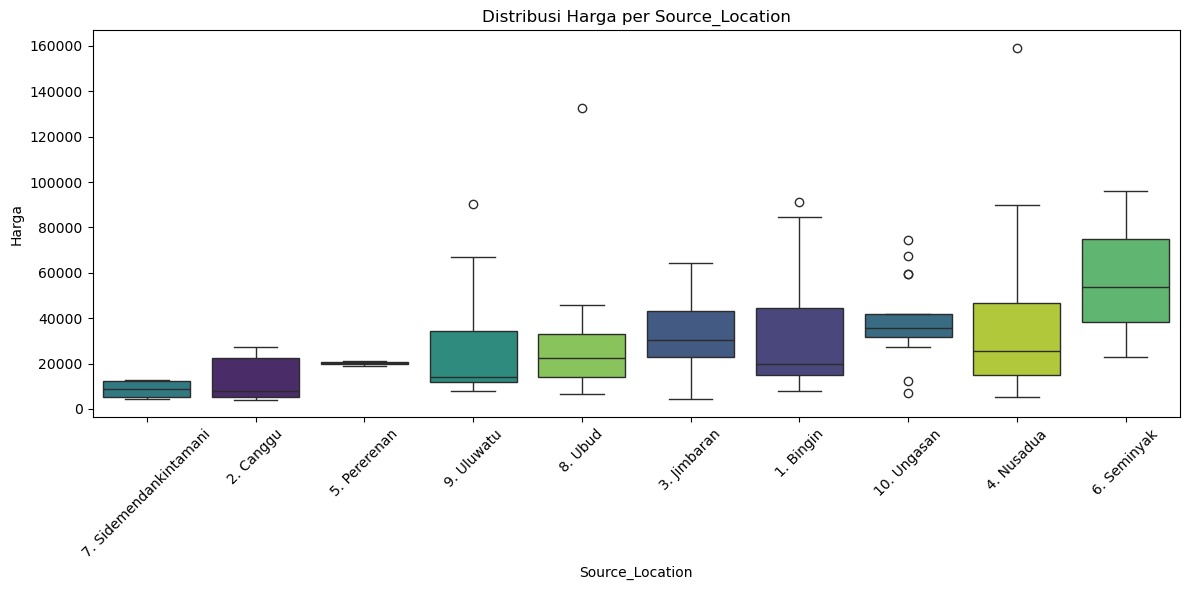

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Source_Location',
    y='Harga',
    data=df,
    order=df.groupby('Source_Location')['Harga'].mean().sort_values().index,
    hue='Source_Location',
    palette='viridis',
    legend=False  
)
plt.title('Distribusi Harga per Source_Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Hubungan kapasitas dengan harga

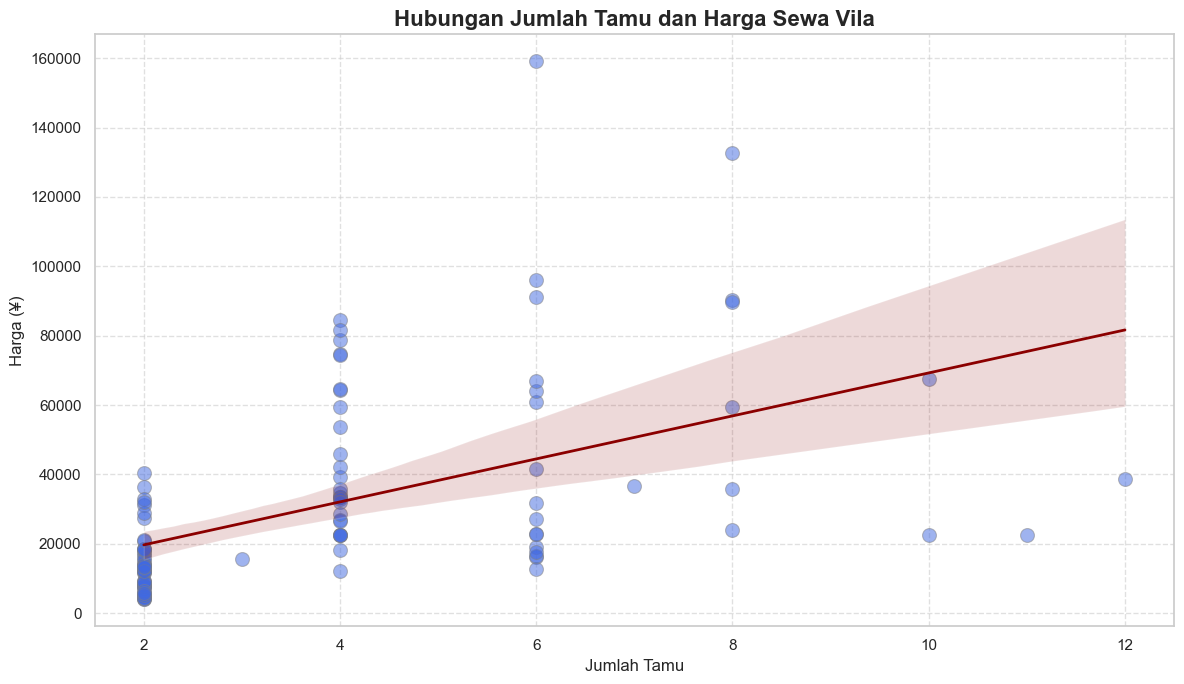

In [17]:
#Jumlah tamu vs Harga
sns.set(style='whitegrid', palette='pastel')
plt.figure(figsize=(12, 7))

sns.scatterplot(
    x='Jumlah_Tamu',
    y='Harga',
    data=df,
    color='royalblue',
    alpha=0.5,
    s=100,
    edgecolor='gray'
)
sns.regplot(
    x='Jumlah_Tamu',
    y='Harga',
    data=df,
    scatter=False,
    color='darkred',
    line_kws={'linewidth': 2}
)

plt.title('Hubungan Jumlah Tamu dan Harga Sewa Vila', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Tamu', fontsize=12)
plt.ylabel('Harga (¥)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


Terlihat adanya kecenderungan positif: semakin banyak jumlah tamu, harga vila cenderung lebih tinggi.
Ini konsisten dengan asumsi bahwa vila yang dapat menampung lebih banyak orang umumnya memiliki ukuran lebih besar atau fasilitas lebih lengkap.

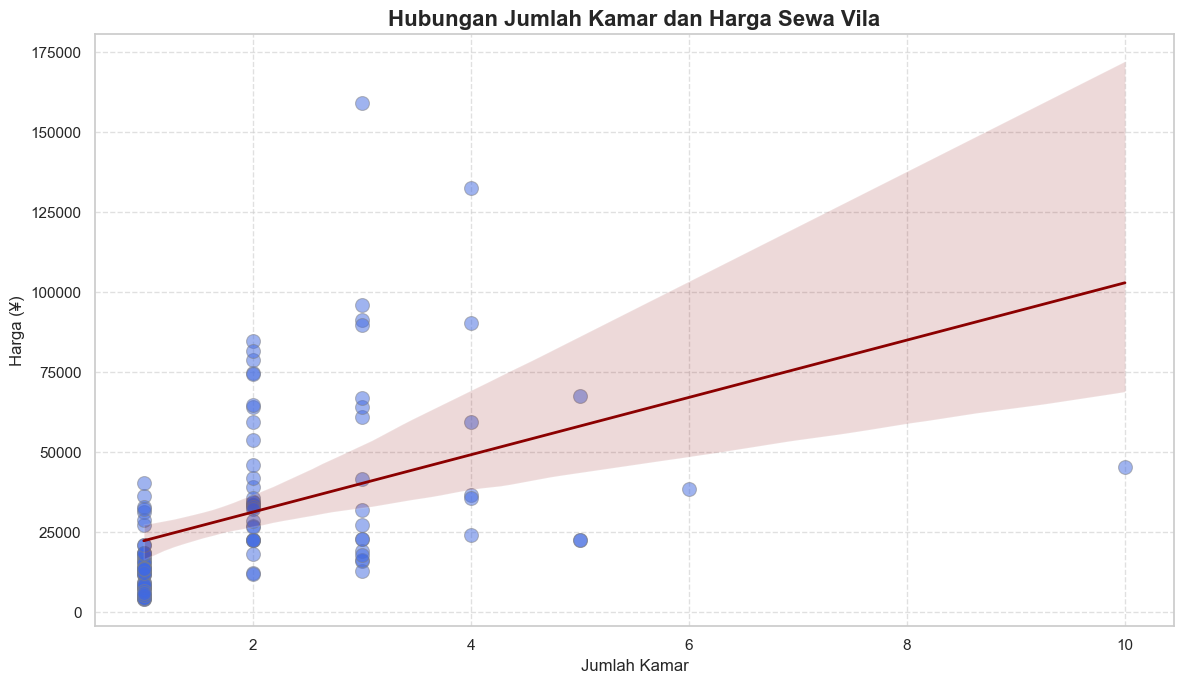

In [18]:
# Jumlah Kamar Tidur vs Harga
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Jumlah_Kamar',
    y='Harga',
    data=df,
    color='royalblue',
    alpha=0.5,
    s=100,
    edgecolor='gray'
)
sns.regplot(
    x='Jumlah_Kamar',
    y='Harga',
    data=df,
    scatter=False,
    color='darkred',
    line_kws={'linewidth': 2}
)
plt.title('Hubungan Jumlah Kamar dan Harga Sewa Vila', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Kamar', fontsize=12)
plt.ylabel('Harga (¥)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


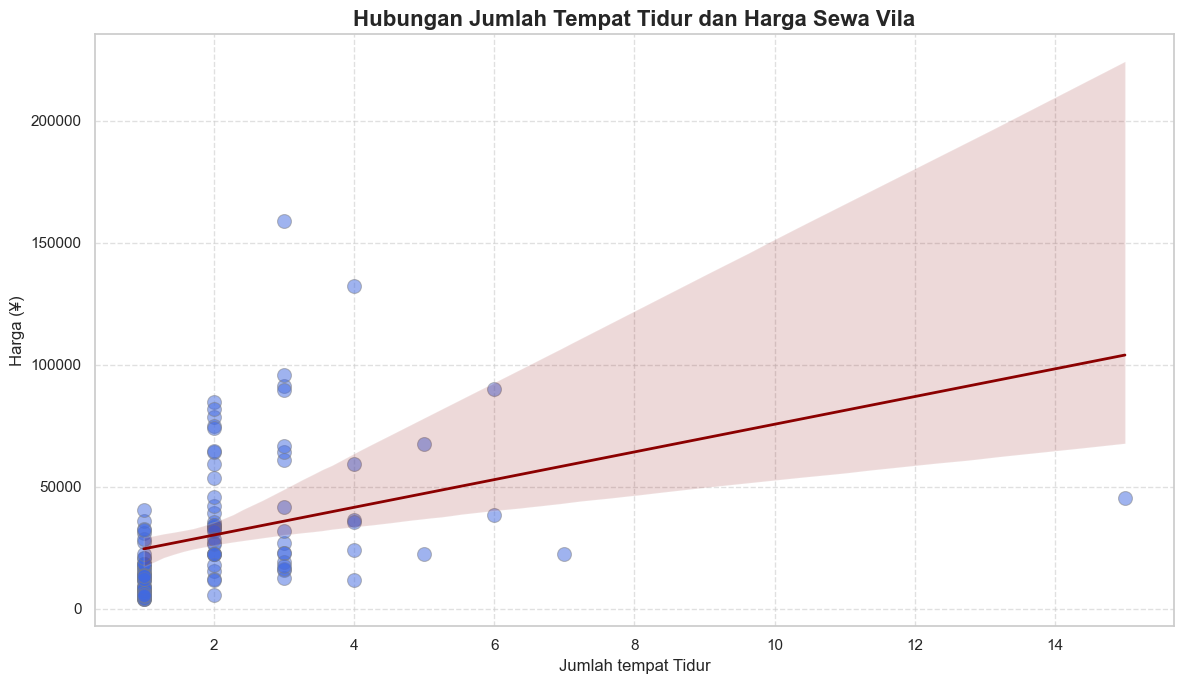

In [19]:
# Jumlah Tempat Tidur vs Harga
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Jumlah_Tempat_Tidur',
    y='Harga',
    data=df,
    color='royalblue',
    alpha=0.5,
    s=100,
    edgecolor='gray'
)
sns.regplot(
    x='Jumlah_Tempat_Tidur',
    y='Harga',
    data=df,
    scatter=False,
    color='darkred',
    line_kws={'linewidth': 2}
)
plt.title('Hubungan Jumlah Tempat Tidur dan Harga Sewa Vila', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah tempat Tidur', fontsize=12)
plt.ylabel('Harga (¥)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- Korelasi Matriks

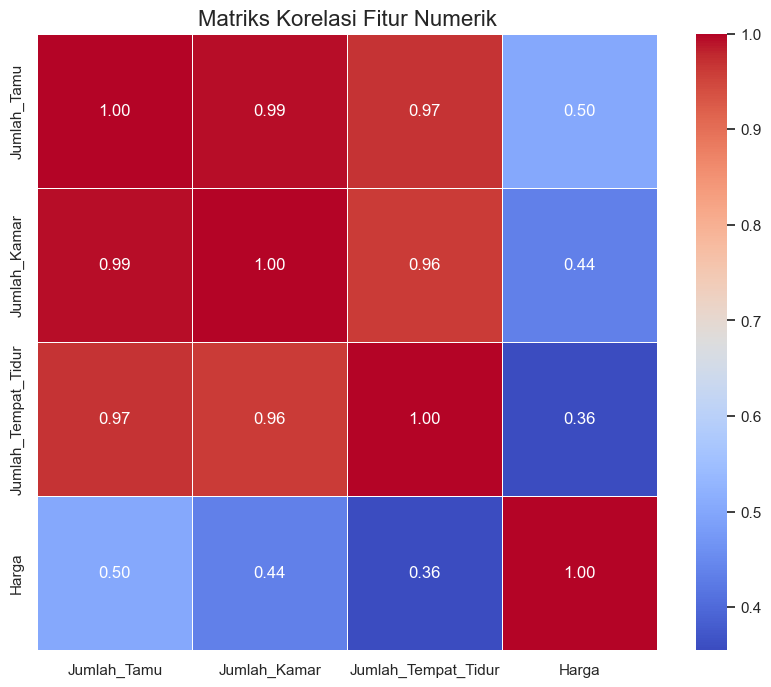


Korelasi antara Harga, Jumlah Tamu, Jumlah Tempat Tidur, Jumlah Kamar d:
                     Jumlah_Tamu  Jumlah_Kamar  Jumlah_Tempat_Tidur     Harga
Jumlah_Tamu             1.000000      0.993761             0.967490  0.503703
Jumlah_Kamar            0.993761      1.000000             0.960420  0.435501
Jumlah_Tempat_Tidur     0.967490      0.960420             1.000000  0.355639
Harga                   0.503703      0.435501             0.355639  1.000000


In [20]:
plt.figure(figsize=(10, 8))
corr = df[['Jumlah_Tamu', 'Jumlah_Kamar', 'Jumlah_Tempat_Tidur', 'Harga']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik', fontsize=16)
plt.show()
print ("\nKorelasi antara Harga, Jumlah Tamu, Jumlah Tempat Tidur, Jumlah Kamar d:")
print(corr)

- 10 Villa termahal

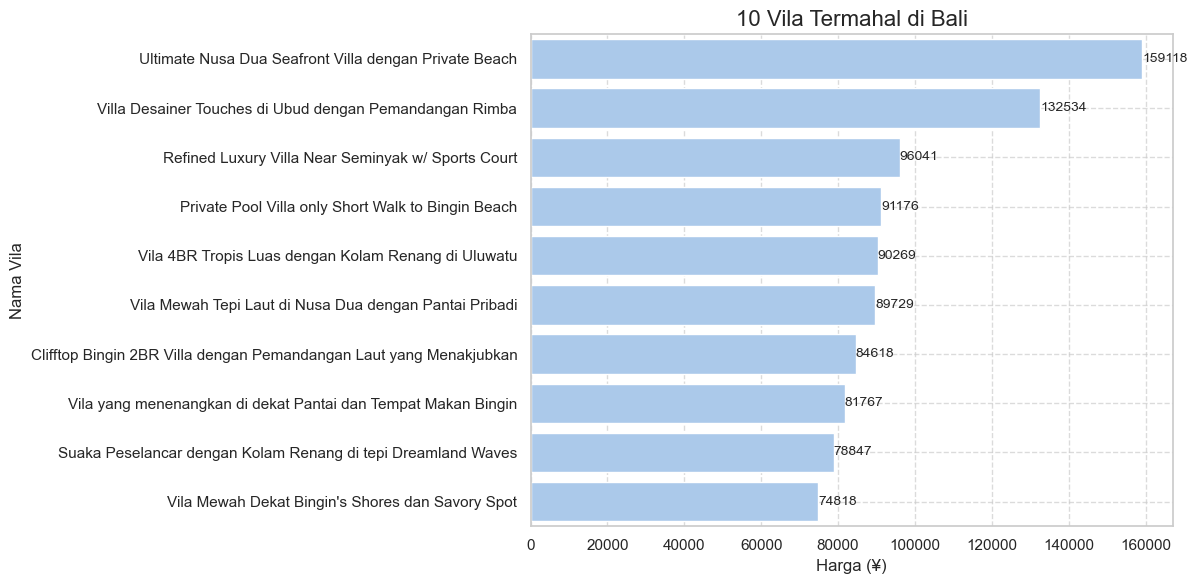

In [21]:
top10_expensive = df.nlargest(10, 'Harga')[['Nama vila', 'Source_Location', 'Jumlah_Tamu', 'Harga']]
plt.figure(figsize=(12, 6))
sns.barplot(x='Harga', y='Nama vila', data=top10_expensive)
plt.title('10 Vila Termahal di Bali', fontsize=16)
plt.xlabel('Harga (¥)', fontsize=12)
plt.ylabel('Nama Vila', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
for index, value in enumerate(top10_expensive['Harga']):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)
plt.tight_layout()
plt.show()

- Persebaran villa berdasarkan lokasi

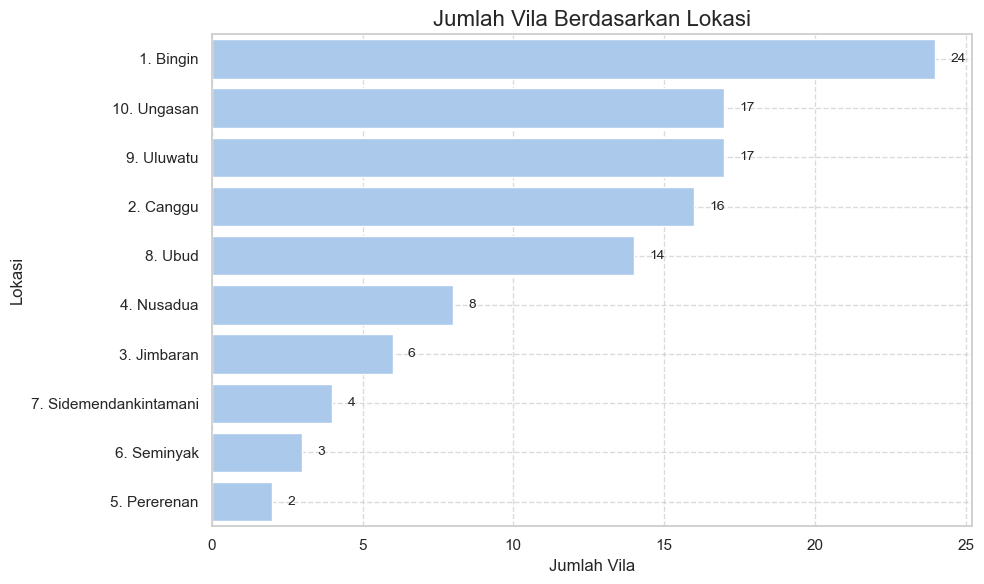

In [22]:
location_counts = df['Source_Location'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index)
plt.title('Jumlah Vila Berdasarkan Lokasi', fontsize=16)
plt.xlabel('Jumlah Vila', fontsize=12)
plt.ylabel('Lokasi', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#tambahkan angka pada setiap bar
for index, value in enumerate(location_counts.values):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)
plt.tight_layout()
plt.show()

# Feature Engineering

In [23]:
# Gunakan hanya fitur relevan
features = ['Jumlah_Kamar', 'Jumlah_Tamu', 'Jumlah_Tempat_Tidur']
target = 'Harga'

In [24]:
# Encode fitur kategorikal
le = LabelEncoder()
df['Lokasi_Encoded'] = le.fit_transform(df['Lokasi'])

In [25]:
# Normalisasi fitur numerik
scaler = StandardScaler()
df[['Ratting_Scaled', 'Kamar_Scaled']] = scaler.fit_transform(df[['Ratting', 'Jumlah_Kamar']])

#  Pemodelan Machine Learning

- Membagi Data (Train-Test Split)

In [26]:
# Split data
X = df[['Jumlah_Tamu', 'Jumlah_Tempat_Tidur', 'Jumlah_Kamar', 'Lokasi_Encoded']]
y = df['Harga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- Random Forest

In [27]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
# Prediksi & evaluasi
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 11685.578950985491
R²: 0.45954222725338967


- XGBoost

In [29]:
xgb_model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
#prediksi & evaluasi
y_pred_xgb = xgb_model.predict(X_test)
print("MAE XGBoost:", mean_absolute_error(y_test, y_pred_xgb))
print("R² XGBoost:", r2_score(y_test, y_pred_xgb))

MAE XGBoost: 12954.706171450407
R² XGBoost: 0.3709299564361572


# Hyperparameter Tuning 

- Menggunakan dengan GridSearchCV:

In [31]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]})

#  Interpretasi Hasil Feature Importance 

- Feature importance

In [32]:
# feature importance
# Ambil importance dari model
feature_importance = model.feature_importances_
features = X_train.columns

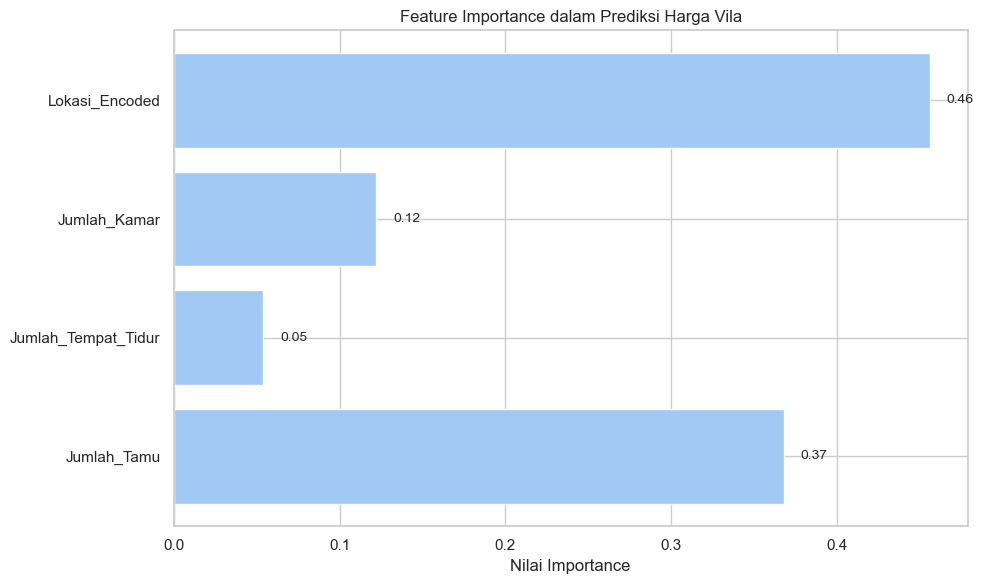

In [33]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.title("Feature Importance dalam Prediksi Harga Vila")
plt.xlabel("Nilai Importance")
for index, value in enumerate(feature_importance):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center', fontsize=10)
plt.tight_layout()
plt.show()

In [34]:
print("Feature Importance:")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")


Feature Importance:
Jumlah_Tamu: 0.3680
Jumlah_Tempat_Tidur: 0.0540
Jumlah_Kamar: 0.1222
Lokasi_Encoded: 0.4557
